In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
segment=pd.read_csv("online_shoppers_intention.csv")

In [2]:
segment.shape

(12330, 18)

In [3]:
segment.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Valores faltantes y tratamiento de categóricas

A continuación código elimina los valores nulos del segmento y luego asigna el segmento X_cat a la matriz de características y el segmento Y al vector de etiquetas. Luego, el código codifica las características categóricas usando el codificador "OneHotEncoder" y transforma las características codificadas

In [4]:
from sklearn import preprocessing

segment.dropna(inplace = True) # Solo hay 14 nulos por lo que eliminarlos no afectará a las predicciones

X_cat = segment.iloc[:,10:-2]
Y = segment.iloc[:,-1]

enc = preprocessing.OneHotEncoder()
enc.fit(X_cat)
X_cat_new = enc.transform(X_cat).toarray()

In [5]:
X_cat

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor
2,Feb,4,1,9,3,Returning_Visitor
3,Feb,3,2,2,4,Returning_Visitor
4,Feb,3,3,1,4,Returning_Visitor
...,...,...,...,...,...,...
12325,Dec,4,6,1,1,Returning_Visitor
12326,Nov,3,2,1,8,Returning_Visitor
12327,Nov,3,2,1,13,Returning_Visitor
12328,Nov,2,2,3,11,Returning_Visitor


In [6]:
X_cat_new = pd.DataFrame(X_cat_new)
X_cat_new.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Una vez realizado el onehotencoding, las categorias quedan nombradas de forma poco práctica.

El código de abajo genera un nuevo conjunto de datos a partir de un conjunto de datos existente. El nuevo conjunto de datos contiene las mismas columnas que el conjunto de datos original, pero el nombre de cada columna está compuesta por una cadena de texto que contiene el nombre de la columna original y el valor de su índice


In [7]:
columnas = []
for fila, nombre in zip(enc.categories_, X_cat.columns):
    for j in fila:
        columnas.append(nombre + ' '+ str(j))

In [8]:
columnas

['Month Aug',
 'Month Dec',
 'Month Feb',
 'Month Jul',
 'Month June',
 'Month Mar',
 'Month May',
 'Month Nov',
 'Month Oct',
 'Month Sep',
 'OperatingSystems 1',
 'OperatingSystems 2',
 'OperatingSystems 3',
 'OperatingSystems 4',
 'OperatingSystems 5',
 'OperatingSystems 6',
 'OperatingSystems 7',
 'OperatingSystems 8',
 'Browser 1',
 'Browser 2',
 'Browser 3',
 'Browser 4',
 'Browser 5',
 'Browser 6',
 'Browser 7',
 'Browser 8',
 'Browser 9',
 'Browser 10',
 'Browser 11',
 'Browser 12',
 'Browser 13',
 'Region 1',
 'Region 2',
 'Region 3',
 'Region 4',
 'Region 5',
 'Region 6',
 'Region 7',
 'Region 8',
 'Region 9',
 'TrafficType 1',
 'TrafficType 2',
 'TrafficType 3',
 'TrafficType 4',
 'TrafficType 5',
 'TrafficType 6',
 'TrafficType 7',
 'TrafficType 8',
 'TrafficType 9',
 'TrafficType 10',
 'TrafficType 11',
 'TrafficType 12',
 'TrafficType 13',
 'TrafficType 14',
 'TrafficType 15',
 'TrafficType 16',
 'TrafficType 17',
 'TrafficType 18',
 'TrafficType 19',
 'TrafficType 20',
 

A continuación, se usa la función zip para crear un diccionario a partir de dos listas. Luego está usando ese diccionario para renombrar las columnas del dataframe.

In [9]:
d = dict(zip(X_cat_new.columns, columnas))
X_cat_new.rename(d, inplace = True, axis = 1)
X_cat_new.head()

,Month Aug,Month Dec,Month Feb,Month Jul,Month June,Month Mar,Month May,Month Nov,Month Oct,Month Sep,...,TrafficType 14,TrafficType 15,TrafficType 16,TrafficType 17,TrafficType 18,TrafficType 19,TrafficType 20,VisitorType New_Visitor,VisitorType Other,VisitorType Returning_Visitor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Se toman los primeros 10 valores de la columna en el dataframe "segment".
Nombramos X_num como variable que declara aquellas columnas con valores numéricos

In [10]:
X_num = segment.iloc[:,:10]
X_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0


# Estandarizar los datos

Se escalan los datos numéricos. Esto significa que transforma los datos de modo que tengan una media de cero y una desviación estándar de uno. Esto es útil para algunos algoritmos de aprendizaje automático.
Se trasforman los datos numéricos de X_num en un nuevo conjunto de datos X_num_new. Luego, se crea un diccionario que asocia las columnas de X_num_new con las columnas de X_num. Finalmente, el código renombra las columnas de X_num_new para que coincidan con las de X_num


In [11]:
esc = preprocessing.StandardScaler() #tanto estandariza como escala
'''
#### Estandarizar
Estandarizar los datos es calcular la media y la desviación estándar de cada columna y luego restar la 
media y dividir entre la desviación estándar:
$$ \frac{x_i - \mu}{\sigma} $$

Esto crea una nueva columna de datos con una media de cero y una desviación estándar de uno.

#### Escalar
Escalar los datos es calcular la media y la desviación estándar de cada columna y luego restar la media y 
dividir entre la desviación estándar:
$$ \frac{x_i - \mu}{\sigma} $$

Esto crea una nueva columna de datos con una media de cero y una desviación estándar de uno.
'''
esc.fit(X_num)
X_num_new = esc.transform(X_num) #esc es el proceso de estandarización
X_num_new = pd.DataFrame(X_num_new)

d = dict(zip(X_num_new.columns, X_num.columns))
X_num_new.rename(d, inplace = True, axis = 1)

X_num_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.697582,-0.457476,-0.396631,-0.245039,-0.691501,-0.624793,3.672627,3.235371,-0.317376,-0.309014
1,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.591360,-0.457458,1.174592,-0.317376,-0.309014
2,-0.697582,-0.463131,-0.396631,-0.252141,-0.691501,-0.625315,3.672627,3.235371,-0.317376,-0.309014
3,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.623399,0.575063,1.998904,-0.317376,-0.309014
4,-0.697582,-0.457476,-0.396631,-0.245039,-0.489202,-0.296996,-0.044449,0.144202,-0.317376,-0.309014


Se concatenan los dos dataframes, X_num_new y X_cat_new, en un solo dataframe, X. La concatenación se realiza a lo largo del eje 1 (axis = 1), lo que significa que los dataframes se concatenarán horizontalmente.

In [12]:
X = pd.concat([X_num_new, X_cat_new], axis = 1)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType 14,TrafficType 15,TrafficType 16,TrafficType 17,TrafficType 18,TrafficType 19,TrafficType 20,VisitorType New_Visitor,VisitorType Other,VisitorType Returning_Visitor
0,-0.697582,-0.457476,-0.396631,-0.245039,-0.691501,-0.624793,3.672627,3.235371,-0.317376,-0.309014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.591360,-0.457458,1.174592,-0.317376,-0.309014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.697582,-0.463131,-0.396631,-0.252141,-0.691501,-0.625315,3.672627,3.235371,-0.317376,-0.309014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.623399,0.575063,1.998904,-0.317376,-0.309014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.697582,-0.457476,-0.396631,-0.245039,-0.489202,-0.296996,-0.044449,0.144202,-0.317376,-0.309014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

# Tratamiento de outliers:
PCA/PLS: Estos métodos parten de la idea es obtener variables latentes (ficticias) – para reducir las variables/dimensiones.
	Estas dimensiones nos dan como resultado un % de variabilidad explicada (nos contentamos con un 80% puesto que al reducir las dimensiones, hay información que se pierde).

La diferencia entre PCA y PLS es que mientras que la PCA sirve para aprendizaje no supervisado, mientras que la PLS se usa para prendizaje supervisado.

### PCA
-	Un gráfico nos aporta – utilizando la misma escala T2 – Todos los datos anómalos a lo largo de todas las variables
    o	Establece dos líneas al 99 y 95% de los datos que son outliers
-	A la hora de construir variables latentes – cada variable explica un % del modelo
    o	No es interesante llegar al 100% de explicabilidad por que no queremos explicar el ruido
    o	Cuanto más próximas al eje se encuentra una línea del eje, mayor correlación entre las variables reales y la latente
    o	Tamaño y color de la fecha explican la contribución de la variable
    o	Las variables que contribuyen poco pueden ser que sean ruido
    o	 Las dimensiones latentes son los ejes perpendiculares, y son completamente independientes



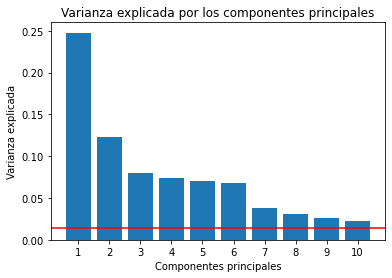

'\nSe genera una gráfica de barras que muestra la varianza explicada por los primeros 10 componentes\nprincipales (el número de componentes elegido es por defecto ). La línea roja representa el porcentaje mínimo de varianza que se debe explicar para considerar\nque un componente es significativo.\n'

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA() #10 columnas por defecto
scores = pca.fit_transform(X, Y)

x = list(range(1, pca.n_components_ + 1))
porcentajes = pca.explained_variance_ratio_
max_components = min(np.shape(X))

fig, ax = plt.subplots()
rect = ax.bar(x[:10], porcentajes[:10])
ax.set_label(rect)
ax.axhline(1/max_components, color = 'r')
ax.set_xticks(x[:10])
ax.set_xlabel('Componentes principales')
ax.set_ylabel('Varianza explicada')
ax.set_title('Varianza explicada por los componentes principales')
plt.show()

'''
Para corregir este error:
AttributeError: 'AxesSubplot' object has no attribute 'bar_label'
Se corrige cambiando "bar_label" por "set_label".
'''

'''
Se genera una gráfica de barras que muestra la varianza explicada por los primeros 10 componentes
principales (el número de componentes elegido es por defecto ). La línea roja representa el porcentaje mínimo de varianza que se debe explicar para considerar
que un componente es significativo.
'''

Se calcula el número de componentes que están por encima de la línea roja. Ese número de componentes explican el 85% de la varianza.

In [15]:
n_comp = sum(1 for i in pca.explained_variance_ratio_ if i > 1/max_components) # Nº de componentes por encima de la linea
pca = PCA(n_components = n_comp)
pca.fit(X, Y)

PCA(n_components=14)

'\nEste código genera una gráfica de los valores de t2\nt2: es una medida de distancia del centro de las proyecciones a cada una de los individuos. Es una medida \nde cómo de anómalo es un valor. Sigue una distribución F de snedecor. Comprobamos el nivel de significación\nde como de lejos está.\nen función del número de componentes principales. La línea amarilla representa el valor crítico de t2 para\nun nivel de significación del 5%, mientras que la línea roja representa el valor crítico de t2 para un \nnivel de significación.\n'

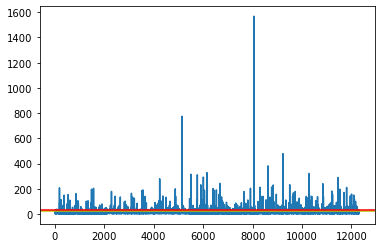

In [16]:
from scipy.stats import f

K = pca.n_components
I = len(X)
dist = f(K, I-K)
scores = pca.transform(X)

t2 = (scores**2 / pca.explained_variance_).sum(axis=1)
F95 = K*(I**2 - 1)/(I*(I - K)) * dist.ppf(0.95)
F99 = K*(I**2 - 1)/(I*(I - K)) * dist.ppf(0.99)

plt.plot(list(range(I)), t2)
plt.axhline(F95, color = 'y')
plt.axhline(F99, color = 'r')

'''
Este código genera una gráfica de los valores de t2
t2: es una medida de distancia del centro de las proyecciones a cada una de los individuos. Es una medida 
de cómo de anómalo es un valor. Sigue una distribución F de snedecor. Comprobamos el nivel de significación
de como de lejos está.
en función del número de componentes principales. La línea amarilla representa el valor crítico de t2 para
un nivel de significación del 5%, mientras que la línea roja representa el valor crítico de t2 para un 
nivel de significación.
'''


F99 correponde a la línea límite que separa los valores anómalos de los que no lo son.
El código de abajo genera una lista de tuplas con los valores de t2 (columna 0) y su índice (columna 1) que son mayores a F99.
Se elimina los 500 primeros valores (las que tienen el valor más alto) de la matriz X e Y.

In [17]:
anomalos_sorted = sorted(list((t,i) for i,t in enumerate(t2) if t > F99))
X = X.drop([i for t,i in anomalos_sorted[:500]], axis = 'index')
Y = Y.drop([i for t,i in anomalos_sorted[:500]], axis = 'index')
X.shape

(11816, 73)

# ANÁLISIS DE LAS VARIABLES
aquí introducir gráficos (histogramas, etc.)

# División de los datos

A continuación, se separan los datos en un conjunto de entrenamiento y un conjunto de prueba. El tamaño del conjunto de prueba es del 20% y el tamaño del conjunto de entrenamiento es del 80%. La semilla (random_state) se establece en 20 para asegurar que los resultados sean reproducibles.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
#random state es una semilla
#Ya hemos eliminado los datos nulos anteriormente, por lo que ahora podemos dividir los datos tranquilamente

### Regresión Logística
Se importa la función LogisticRegression de la biblioteca sklearn y se crea un modelo de predicción 'lr'. Luego, se calcula el valor de la validación cruzada utilizando 5 subgrupos y se almacenan los resultados en la variable "cv". Por último, se imprimen los resultados y se calcula el promedio.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
'''
Con accuracy_score obtenemos la precisión de la predicción del valor del test real
en comparación con el predicho a partir del train. Obtenemos 0.89
'''
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C = 0.1, max_iter = 1000, random_state = 20) 

#ajustamos el max_iter para que no salga ningún warning

cv = cross_val_score(lr, X_train, Y_train, cv = 5)

print(cv)
print(cv.mean())

[0.84294024 0.84505553 0.85185185 0.84656085 0.84814815]
0.8469113231990016


###  Red Neuronal
Este código importa un clasificador de red neuronal de la librería sklearn, luego inicializa el clasificador con una capa oculta de 10 neuronas y 5 neuronas, una función de activación de tipo relu y un solucionador de tipo adam, una tasa de aprendizaje inicial de 0.001 y un estado aleatorio de 20. Luego, se calcula el valor de validación cruzada utilizando 5 divisiones. Se imprime este valor y el  del promedio.

In [20]:
from sklearn.neural_network import MLPClassifier
'''
mediante una tupla se determina el número de capas(elementos) y el número de 
neuronas en cada capa) de la red neuronal (MLPClassifier)
'''

nn = MLPClassifier(hidden_layer_sizes = (10, 5), activation = 'relu', solver = 'adam', 
                   learning_rate_init = 0.001, random_state = 20, max_iter = 1000)
#Función de activación por defecto: ‘relu’ – la más rápida de calcular
'''
Método para calcular los pesos de las neuronas que minimicen el error:‘adam’ 
    – este método de descenso por gradientes es útil cuando tienes muchos datos 
    y muchos mínimos regionales
'''
# Learning_rate_init es el tamaño de los saltos en iteraciones

cv = cross_val_score(nn, X_train, Y_train, cv = 5)

print(cv)
print(cv.mean())

[0.83712322 0.83606557 0.84656085 0.84126984 0.82804233]
0.8378123609747089


### Máquinas de Soporte Vectorial
Este código importa la función SVC de la librería sklearn. Luego, define una variable sv que contiene una SVC con un parámetro C igual a 0.1. El parámetro kernel indica que se usará un kernel rbf y el parámetro gamma indica que se usará el valor por defecto. Tras calcular el cross validation score, se imprime su valor y su media

In [21]:
from sklearn.svm import SVC

sv = SVC(C = 0.1, kernel = 'rbf', gamma = 'scale', random_state = 20)
#gamma es su parámetro que nos ayuda a ajustar los datos por la varianza ‘scale’

cv = cross_val_score(sv, X_train, Y_train, cv = 5)

print(cv)
print(cv.mean())

[0.84717081 0.84717081 0.84761905 0.84708995 0.84708995]
0.8472281119980749


# Grid Search CV y Optimización de parámetros
A continuación nos centraremos en uno de los modelos creados anteriormente. El código escrito, utiliza la función GridSearchCV de la biblioteca sklearn. Esta función se usa para buscar los mejores parámetros para un modelo de aprendizaje automático. En este caso, está buscando los mejores parámetros para un modelo de regresión logística.

In [22]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter = 1000)

grid = GridSearchCV(lr, {'C' : [0.01, 0.1, 1, 10], 'penalty' : ['l2', 'none']})
'''
Los valores de C especifican la cantidad de regularización a aplicar al modelo. A mayor C, menor 
regularización.
Los valores de penalty especifican el tipo de regularización a aplicar al modelo. 'l2' es el tipo de 
regularización más común y 'none' significa que no se aplicará ningún tipo de regularización.
'''
grid.fit(X, Y)

C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ferna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'none']})

nos da los resultados de la lista y lo convertimos a tabla

In [23]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136319,0.007799,0.007365,0.000327,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.850254,0.844266,0.841303,0.843843,0.831570,0.842247,0.006093,1
1,2.274641,0.387231,0.008343,0.000836,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.852792,0.841303,0.843419,0.837072,0.828608,0.840639,0.007916,3
2,0.314328,0.012013,0.008170,0.000891,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.850677,0.841727,0.843419,0.840034,0.829031,0.840978,0.006989,2
3,2.298588,0.412380,0.008442,0.000548,0.1,none,"{'C': 0.1, 'penalty': 'none'}",0.852792,0.841303,0.843419,0.837072,0.828608,0.840639,0.007916,3
4,0.732152,0.036058,0.008591,0.001589,1,l2,"{'C': 1, 'penalty': 'l2'}",0.850677,0.841727,0.842996,0.838341,0.827338,0.840216,0.007600,7
5,2.265010,0.400396,0.008174,0.001013,1,none,"{'C': 1, 'penalty': 'none'}",0.852792,0.841303,0.843419,0.837072,0.828608,0.840639,0.007916,3
6,2.055544,0.425072,0.012932,0.005035,10,l2,"{'C': 10, 'penalty': 'l2'}",0.850254,0.841303,0.842996,0.837495,0.828185,0.840047,0.007234,8
7,2.544801,0.613858,0.008310,0.000834,10,none,"{'C': 10, 'penalty': 'none'}",0.852792,0.841303,0.843419,0.837072,0.828608,0.840639,0.007916,3


Concluimos que el parametro C = 0.01 es el que mejores resultados da, cuando el penalty es = l2

#  ROC

Para comparar nuestros modelos, se importa la función RocCurveDisplay de la librería sklearn.metrics, así como la librería matplotlib.pyplot como plt. Luego, se define los tres clasificadores: SVC, NN y LR. A continuación, se entrena a cada clasificador con el conjunto de datos de entrenamiento y luego evalúa su rendimiento en el conjunto de datos de prueba. Finalmente, el código grafica las curvas ROC de cada clasificador y muestra sus marcas de precisión.

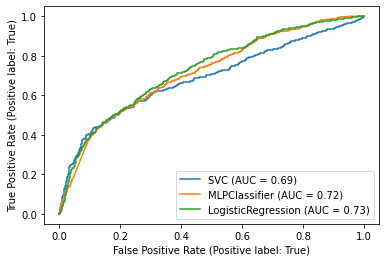

SVC:  0.8401015228426396
NN:  0.8379864636209814
LR:  0.8388324873096447


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

sv = SVC(C = 0.1, kernel = 'rbf', gamma = 'scale', random_state = 20)
sv.fit(X_train, Y_train)

nn = MLPClassifier(hidden_layer_sizes = (10, 5), activation = 'relu', solver = 'adam', 
                   learning_rate_init = 0.001, random_state = 20, max_iter = 1000)
nn.fit(X_train, Y_train)

lr = LogisticRegression(C = 0.1, max_iter = 1000, random_state = 20)
lr.fit(X_train, Y_train)

ax = plt.gca()
RocCurveDisplay.from_estimator(sv, X_test, Y_test, ax = ax)
RocCurveDisplay.from_estimator(nn, X_test, Y_test, ax = ax)
RocCurveDisplay.from_estimator(lr, X_test, Y_test, ax = ax)
plt.show()
print('SVC: ', sv.score(X_test, Y_test))
print('NN: ', nn.score(X_test, Y_test))
print('LR: ', lr.score(X_test, Y_test))


En los métodos de caja negra no se añade una explicación a que variables son relevantes. Sin embargo, es recomendable contemplar las variables que tengan una justificación aparente, para evitar las correlaciones expúreas.
En la estadística inferencial sí que se podría incluir todas las variables en el modelo y después eliminar de una en una.

A pesar de que NN y SVC obtienen muy buenos resultados, son muy similares a LR, por lo que, con el propósito de no perder interpretabilidad, trabajaremos sobre la LR. El código de abajo, genera una curva ROC para un modelo de regresión logística. La curva ROC es una representación gráfica de la sensibilidad (TPR) y especificidad (1-FPR) de un clasificador. Se usa para evaluar el rendimiento de un clasificador.

El código calcula el TPR y FPR para diferentes umbrales de probabilidad y luego grafica la curva ROC. El código también encuentra el umbral óptimo de probabilidad, que es el umbral que maximiza la sensibilidad y especificidad.

# AUC

El umbral de probabiliad óptimo es: 0.15


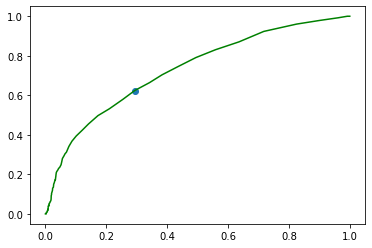

In [25]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

tprs, fprs, umbrales, aucs = [], [], [], []
'''
-tprs es una lista que contiene los valores de sensibilidad para diferentes umbrales.
-fprs es una lista que contiene los valores de especificidad para diferentes umbrales.
-umbrales es una lista que contiene los umbrales de probabilidad utilizados para calcular tprs y fprs.
-aucs es una lista que contiene los valores del área bajo la curva ROC para diferentes umbrales.
'''
Y_pred_prob = lr.predict_proba(X_test)

for umbral in range(0, 101, 1):
    umbral = umbral/100
    umbrales.append(umbral)
    Y_pred = [p >= umbral for _,p in Y_pred_prob] 
    # Solo nos interesa el segundo valor que es la probabilidad de ser True
    
    tpr = sum(1 for r,p in zip(Y_test, Y_pred) if r == p == True) / sum(Y_test)
    fpr = sum(1 for r,p in zip(Y_test, Y_pred) if r == False and p == True) / (len(Y_test) - sum(Y_test))
    
    tprs.append(tpr)
    fprs.append(fpr)
    
    aucs.append(roc_auc_score(Y_test, Y_pred))

# RocCurveDisplay.from_estimator(lr, X_test, Y_test) # Descomenta para comprobar que da el mismo resultado
plt.plot(fprs, tprs, color = 'g')
_, i = max((d, i) for i,d in enumerate(aucs))
print(f'El umbral de probabiliad óptimo es: {umbrales[i]}')
plt.scatter(fprs[i], tprs[i])
plt.show()


In [26]:
lr.coef_[0] # el coeficiente de regresión logística para el primer atributo.
#El resultado es una lista de los coeficientes de regresión logística para cada atributo.

array([ 2.47271161e-02, -1.82591049e-02,  7.46530796e-02, -4.61747139e-03,
        1.21111416e-01,  1.85479987e-02,  4.31750568e-02, -1.58654485e-01,
        6.68596323e-01, -4.75641807e-02,  2.13265056e-01,  5.13382103e-02,
       -6.70168744e-01,  3.08601514e-01, -1.07524424e-01, -3.80469960e-01,
       -2.63481037e-01,  4.43857567e-01,  2.64599569e-01,  1.37595011e-01,
       -8.44996413e-02,  4.70586892e-02, -8.58175962e-03,  4.66066210e-02,
        9.64251007e-03, -9.83528507e-02, -5.55219281e-02,  1.41261121e-01,
        2.69329694e-02, -1.21646103e-01, -2.77355977e-01, -5.61386248e-02,
        1.32892023e-01,  7.21615124e-02, -2.94070424e-02,  1.31057507e-01,
       -6.38924801e-03, -6.15745382e-02,  9.64251007e-03,  7.18691971e-02,
        1.05568576e-01,  1.26045831e-01,  1.15695395e-01,  1.69154727e-01,
        8.57871500e-02, -1.65912362e-01,  1.56650881e-02, -1.08155925e-01,
       -8.28114188e-02, -1.57855724e-01, -1.06743234e-01,  5.36691193e-02,
       -1.01839092e-01, -

In [27]:
coefs = pd.DataFrame({'variable':X.columns, 'coef':lr.coef_[0]})
#df que contiene los nombres de las variables y sus respectivos coeficientes de regresión logística.
coefs.sort_values(by = 'coef')
#ordena el dataframe en orden ascendente por el coeficiente de regresión logística.
#podemos obserbar que variables son más o menos relevantes.

,variable,coef
12,Month Feb,-0.670169
15,Month Mar,-0.380470
62,TrafficType 13,-0.280405
30,Browser 3,-0.277356
16,Month May,-0.263481
...,...,...
69,TrafficType 20,0.221565
18,Month Oct,0.264600
13,Month Jul,0.308602
17,Month Nov,0.443858


In [28]:
X_train.shape

(9452, 73)

In [29]:

#Al final de todo, para no sobreajustar, cambiamos los parámetros ajustados después del Grid Search
from sklearn.metrics import accuracy_score

nn = MLPClassifier(hidden_layer_sizes = (10, 5), activation = 'relu', solver = 'adam', 
                   learning_rate_init = 0.001, random_state = 20, max_iter = 1000)
nn.fit(X_train, Y_train)

print(accuracy_score(Y_test, nn.predict(X_test))) # Precisión de la NN

lr = LogisticRegression(C = 0.1, max_iter = 1000, random_state = 20)
lr.fit(X_train, nn.predict(X_train))

print(accuracy_score(nn.predict(X_test), lr.predict(X_test))) # Precisión de la regresión log sobre la NN

coefs = pd.DataFrame({'variable':X.columns, 'coef':lr.coef_[0]})
coefs.sort_values(by = 'coef')

0.8379864636209814
0.9572758037225042


,variable,coef
53,TrafficType 4,-1.197373
11,Month Dec,-0.941132
7,ExitRates,-0.822196
42,Region 2,-0.771171
31,Browser 4,-0.758760
...,...,...
6,BounceRates,0.580117
41,Region 1,0.647723
15,Month Mar,0.651635
19,Month Sep,0.757340


### Problema de datos desbalanceado

Tenemos muy pocos datos de la variable objetivo que sean Trues
Para corregir esto hay que fijarse en un valor que no sea el acc
En el GridSearch - fijarse en: f1 macro
F1-Score : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall
mirar la matriz de confusión

Al final se predicen todos los trues.


In [30]:
trues = [n for n,i in enumerate(Y_train) if i is True]
falses = [n for n,i in enumerate(Y_train) if i is False]

Se genera una lista de números en base a una condición. En este caso, la 
condición es si el elemento de la lista es True o False. Si el elemento es 
True, se añade el número de la posición en la que se encuentra a la lista 
"trues".
Si el elemento es False, se añade el número de la posición en la que se 
encuentra a la lista "falses".

In [31]:
indice = 24

print(X_train.iloc[indice])
print('\n')
print(f'Etiqueta real: {Y_train.iloc[indice]}')
fila = np.array(X_train.iloc[indice]).reshape(1, -1)
lr.predict(fila)
# imprime una fila de datos de entrenamiento y su etiqueta real, y luego usa el 
#modelo de regresión logística para hacer una predicción.

Administrative                  -0.697582
Administrative_Duration         -0.457476
Informational                   -0.396631
Informational_Duration          -0.245039
ProductRelated                  -0.264425
                                   ...   
TrafficType 19                   0.000000
TrafficType 20                   0.000000
VisitorType New_Visitor          1.000000
VisitorType Other                0.000000
VisitorType Returning_Visitor    0.000000
Name: 8227, Length: 73, dtype: float64


Etiqueta real: True


C:\Users\ferna\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [32]:
lr.predict(X_train.iloc[trues])
#Comprobamos que muchos de los valores predecidos como trues, son en realdad false.

array([False, False, False, ...,  True, False, False])

### Construimos la LR con el f1_score

In [33]:
from sklearn.metrics import confusion_matrix,f1_score
Y_pred = lr.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
f1=f1_score(Y_test,Y_pred, average='micro') #why micro?
'''
'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.
'''
#Obtenemos muchos falsos positivos y más falsos negativos que true negativos
print(f"f1:{f1}")
print(cm)


f1:0.8384094754653131
[[1964   22]
 [ 360   18]]


In [44]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,Y_pred))#,labels=['True','False']))


[[1964   22]
 [ 360   18]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

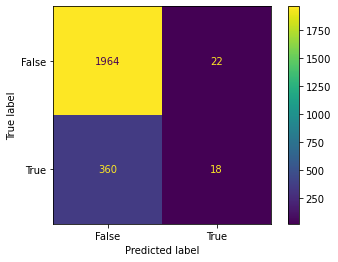

In [41]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
